# Setting

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import random
import shap 
import rtdl
import joblib

import torch

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
def conf_matrix(y_true, y_pred):    
    acc = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    mat = confusion_matrix(y_true, y_pred)
    labels = ['0(Non Risk)', '1(Risk)']
    colors=['whitesmoke', 'steelblue']
    sns.heatmap(mat, annot=True, cmap=colors, xticklabels=labels, yticklabels=labels, fmt="d")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    print('Accuracy:', acc)
    print('Recall:', recall)
    print('Precision:', precision)
    print('F1:', f1)

In [3]:
def seed_everything(seed = 21):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
seed_everything()

# Evaluating 

In [5]:
X_test = pd.read_csv('./test.csv', index_col=0)
X_test

,anchor_age,Lactic Acid,Temperature Fahrenheit,O2 saturation pulseoxymetry,Braden Mobility,Heart Rate,GCS - Motor Response,Respiratory Rate,NaCl 0.9%,Non Invasive Blood Pressure systolic,...,Direct Bilirubin,Wound Vac #1,Calcium Chloride,18 Gauge placed in the field,Unable to assess cognitive / perceptual,Orientation,Cerebral Subdural #1,Back Care,Ciprofloxacin,Dextrose 10%
56334,0.761827,-0.006388,0.349737,0.247205,-1.090747,-0.005859,-1.842372,-0.008081,-0.475567,-0.418407,...,-0.06246,-0.03799,-0.011348,-0.132419,-0.430304,-0.517111,-0.025594,-0.412167,-0.019776,-0.04213
32992,0.174369,-0.006867,0.386649,0.208395,-0.244208,0.000184,0.604787,-0.004872,-0.542814,0.122706,...,-0.06246,-0.03799,-0.011348,-0.132419,-0.430304,1.933820,-0.025594,-0.412167,-0.019776,-0.04213
43560,-0.413089,-0.005753,0.367391,0.007904,-0.244208,0.005887,-0.374077,0.001669,-0.485190,0.013876,...,-0.06246,-0.03799,-0.011348,-0.132419,-0.430304,-0.517111,-0.025594,-0.412167,-0.019776,-0.04213
57774,0.585589,-0.006624,0.327269,-0.053921,0.602331,0.005887,0.604787,-0.003869,-0.379547,0.025630,...,-0.06246,-0.03799,-0.011348,-0.132419,-0.430304,-0.517111,-0.025594,-0.412167,-0.019776,-0.04213
45850,-1.470514,-0.006584,0.347169,0.240191,0.179061,-0.000694,0.604787,-0.005173,-0.542814,0.124226,...,-0.06246,-0.03799,-0.011348,-0.132419,-0.430304,-0.517111,-0.025594,-0.412167,-0.019776,-0.04213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5240,1.643014,-0.006867,0.438005,0.279936,-0.244208,-0.001023,-0.863509,-0.005674,-0.542814,0.135474,...,-0.06246,-0.03799,-0.011348,-0.132419,-0.430304,-0.517111,-0.025594,-0.412167,-0.019776,-0.04213
46263,0.468098,-0.006867,0.317640,0.140829,-0.244208,-0.005914,0.604787,-0.008583,-0.542814,0.008890,...,-0.06246,-0.03799,-0.011348,-0.132419,-0.430304,1.933820,-0.025594,-0.412167,-0.019776,-0.04213
51507,0.468098,-0.006867,0.415537,0.187198,0.602331,-0.009365,0.017469,-0.004220,1.376638,0.168914,...,-0.06246,-0.03799,-0.011348,-0.132419,-0.430304,-0.517111,-0.025594,-0.412167,-0.019776,-0.04213
13766,0.996810,-0.006867,0.336898,0.009671,0.602331,0.002377,0.604787,-0.000460,-0.222239,0.182898,...,-0.06246,-0.03799,-0.011348,-0.132419,2.327884,1.933820,-0.025594,-0.412167,-0.019776,-0.04213


In [6]:
y_test = pd.read_csv('./y_test.csv', index_col=0)
y_test

,mortality_in_3days
56334,0
32992,0
43560,0
57774,0
45850,0
...,...
5240,1
46263,1
51507,1
13766,1


In [6]:
# except TabNet (hard to calculate Shapley values)

xgb = joblib.load('XGBoost.pkl')

resnet = rtdl.ResNet.make_baseline(d_in=X_test.shape[1],
                                   d_main=256,
                                   d_hidden=128,
                                   dropout_first=0.3,
                                   dropout_second=0.3,
                                   n_blocks=2,
                                   d_out=1)

resnet = torch.load('ResNet')
resnet.eval()

lgbm = joblib.load('LightGBM.pkl')

rf = joblib.load('RandomForest.pkl')

lr = joblib.load('LogisticRegression.pkl')

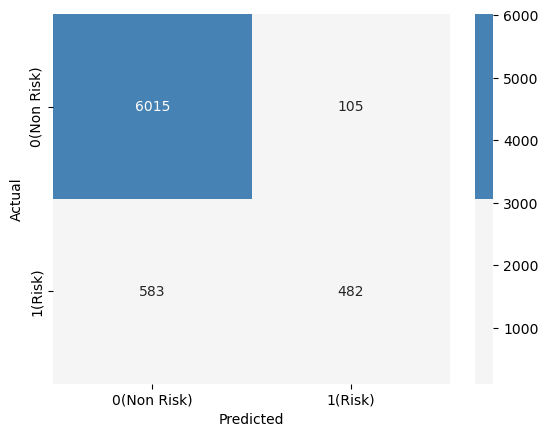

Accuracy: 0.9042449547668754
Recall: 0.45258215962441317
Precision: 0.8211243611584327
F1: 0.5835351089588378


In [7]:
preds = xgb.predict(X_test.values)

conf_matrix(y_test, preds)

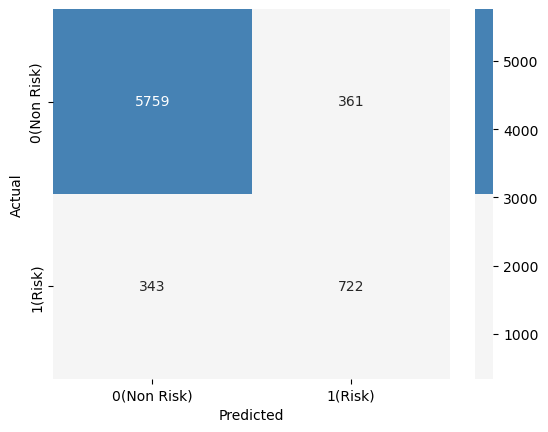

Accuracy: 0.9020180932498261
Recall: 0.6779342723004694
Precision: 0.6666666666666666
F1: 0.6722532588454375


In [8]:
preds = lgbm.predict(X_test.values)

conf_matrix(y_test, preds)

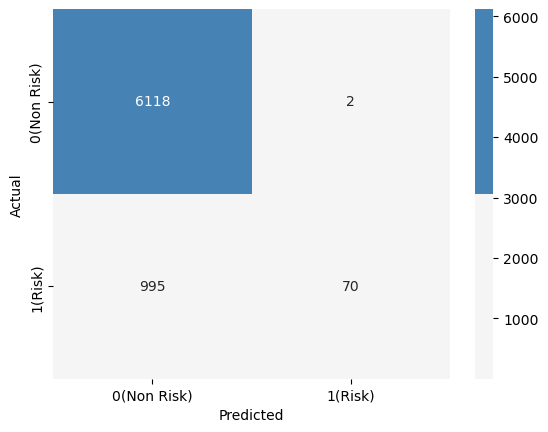

Accuracy: 0.8612386917188587
Recall: 0.06572769953051644
Precision: 0.9722222222222222
F1: 0.12313104661389623


In [9]:
preds = rf.predict(X_test.values)

conf_matrix(y_test, preds)

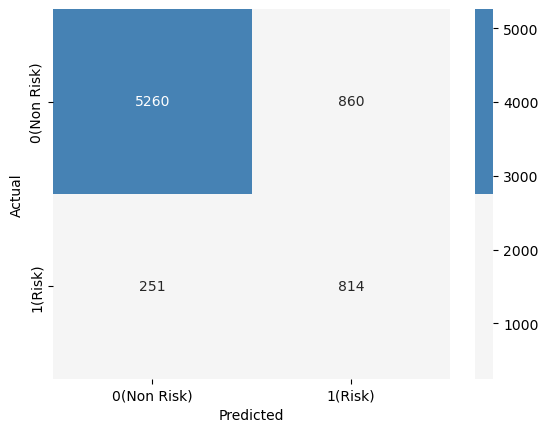

Accuracy: 0.8453723034098817
Recall: 0.7643192488262911
Precision: 0.4862604540023895
F1: 0.5943775100401606


In [10]:
preds = lr.predict(X_test.values)

conf_matrix(y_test, preds)

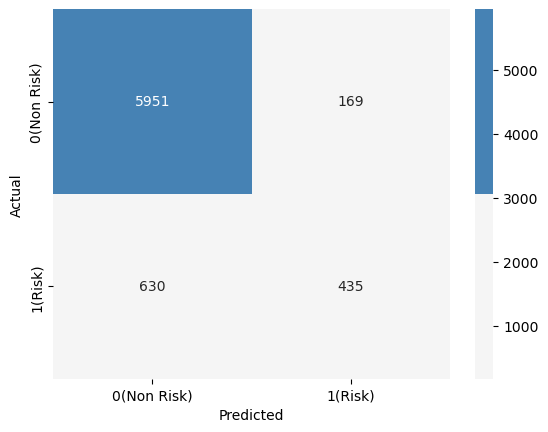

Accuracy: 0.8887961029923451
Recall: 0.4084507042253521
Precision: 0.7201986754966887
F1: 0.5212702216896345


In [11]:
# threshold = 0.5
preds = torch.sigmoid(resnet(torch.tensor(X_test.values, dtype=torch.float))) >= torch.FloatTensor([0.5])
preds = np.where(preds.numpy(), 1, 0)

conf_matrix(y_test, preds)

In [47]:
def model_auc_roc(model):
    if str(model)[:3] == 'Res':
        preds_proba = torch.sigmoid(model(torch.tensor(X_test.values, dtype=torch.float))).detach().numpy().reshape(-1, )
        preds = torch.sigmoid(resnet(torch.tensor(X_test.values, dtype=torch.float))) >= torch.FloatTensor([0.5])
        preds = np.where(preds.numpy(), 1, 0)
        
    elif str(model)[:3] == 'LGB': 
        preds_proba = model.predict_proba(X_test.values, verbose=-1)[:, 1]
        preds = model.predict(X_test.values, verbose=-1)
        
    else:
        preds_proba = model.predict_proba(X_test.values)[:, 1]
        preds = model.predict(X_test.values)
    
    print('Model AUROC (binary):', roc_auc_score(y_test, preds))
    print('Model AUROC (probability):', roc_auc_score(y_test, preds_proba))

In [43]:
models = [xgb, lgbm, rf, lr, resnet]
model_name = ['XGBoost', 'LightGBM', 'RandomForest', 'LogisticRegression', 'ResNet']

for i, model in enumerate(models):
    print(model_name[i])
    model_auc_roc(model)
    print()

XGBoost
Model AUROC (binary): 0.7177126484396575
Model AUROC (probability): 0.896403080794133

LightGBM
Model AUROC (binary): 0.8094736720979471
Model AUROC (probability): 0.9215344134523918

RandomForest
Model AUROC (binary): 0.5327004510724478
Model AUROC (probability): 0.9081033477553776

LogisticRegression
Model AUROC (binary): 0.8118981865046488
Model AUROC (probability): 0.8983867255822517

ResNet
Model AUROC (binary): 0.6904181625701924
Model AUROC (probability): 0.8484721071527203



In [14]:
xgb_preds_proba = xgb.predict_proba(X_test.values)[:, 1]
lgbm_preds_proba = lgbm.predict_proba(X_test.values)[:, 1]
rf_preds_proba = rf.predict_proba(X_test.values)[:, 1]
lr_preds_proba = lr.predict_proba(X_test.values)[:, 1]
resnet_preds_proba = torch.sigmoid(resnet(torch.tensor(X_test.values, dtype=torch.float))).detach().numpy().reshape(-1, )

preds_proba = xgb_preds_proba + lgbm_preds_proba + rf_preds_proba + resnet_preds_proba + lr_preds_proba
preds_proba = pd.Series(preds_proba)

In [15]:
preds_proba.describe()

count    7185.000000
mean        0.761264
std         1.034561
min         0.003610
25%         0.089126
50%         0.306875
75%         0.966613
max         4.699155
dtype: float64

In [16]:
# normalize into [0, 1]
preds_proba_normalize = preds_proba / 5
preds_proba_normalize.describe()

count    7185.000000
mean        0.152253
std         0.206912
min         0.000722
25%         0.017825
50%         0.061375
75%         0.193323
max         0.939831
dtype: float64

In [17]:
# Maximum AUROC in single model : 0.9215344134523918 (LightGBM)

print('Soft Voting AUROC (probability):', roc_auc_score(y_test, preds_proba_normalize))

Soft Voting AUROC (probability): 0.9230151278038603


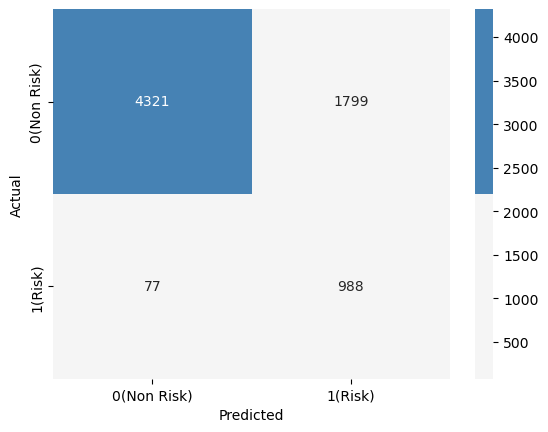

Accuracy: 0.7389004871259569
Recall: 0.927699530516432
Precision: 0.35450304987441694
F1: 0.5129802699896158


In [18]:
test_pred_proba = np.where(preds_proba_normalize >= 0.1, 1, 0)

conf_matrix(y_test, test_pred_proba)

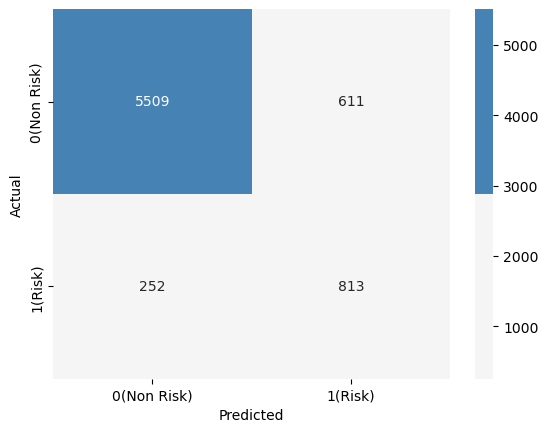

Accuracy: 0.8798886569241475
Recall: 0.7633802816901408
Precision: 0.5709269662921348
F1: 0.6532744073925272


In [19]:
test_pred_proba = np.where(preds_proba_normalize >= 0.25, 1, 0)

conf_matrix(y_test, test_pred_proba)

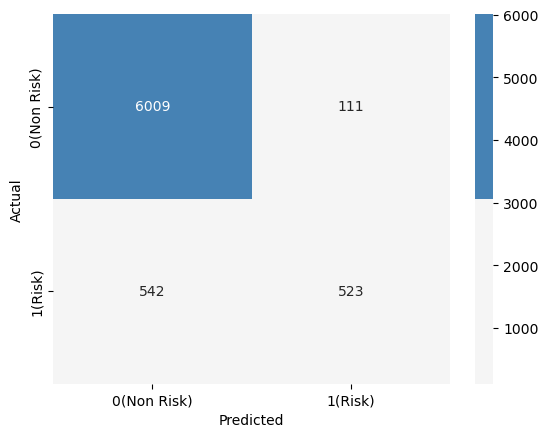

Accuracy: 0.909116214335421
Recall: 0.49107981220657276
Precision: 0.8249211356466877
F1: 0.6156562683931724


In [20]:
test_pred_proba = np.where(preds_proba_normalize >= 0.5, 1, 0)

conf_matrix(y_test, test_pred_proba)

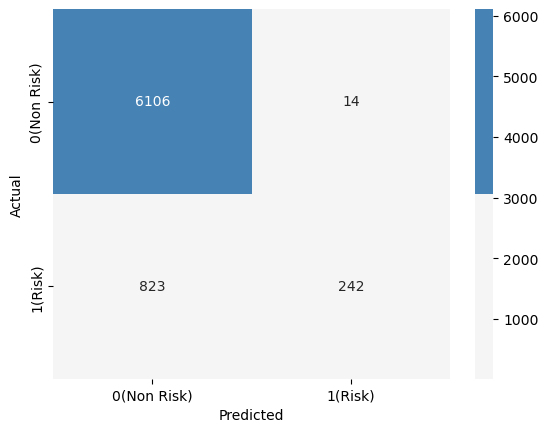

Accuracy: 0.8835073068893529
Recall: 0.2272300469483568
Precision: 0.9453125
F1: 0.3663890991672975


In [21]:
test_pred_proba = np.where(preds_proba_normalize >= 0.75, 1, 0)

conf_matrix(y_test, test_pred_proba)

In [22]:
# probability groupby class label 
preds_df = pd.concat([preds_proba_normalize, y_test.reset_index(drop=True)], axis=1)
preds_df.columns = ['Preds', 'Label']

preds_df.groupby('Label')['Preds'].describe()

,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
0,6120.0,0.093481,0.122832,0.000722,0.014640,0.044580,0.120526,0.871560
1,1065.0,0.489985,0.261264,0.001853,0.260562,0.490417,0.719647,0.939831


# Evaluating(tuned)

In [23]:
# ResNet : uses baseline (hard to tuning ..)

xgb_tuned = joblib.load('XGBoost_tuned.pkl')

lgbm_tuned = joblib.load('LightGBM_tuned.pkl')

rf_tuned = joblib.load('RandomForest_tuned.pkl')

lr_tuned = joblib.load('LogisticRegression_tuned.pkl')

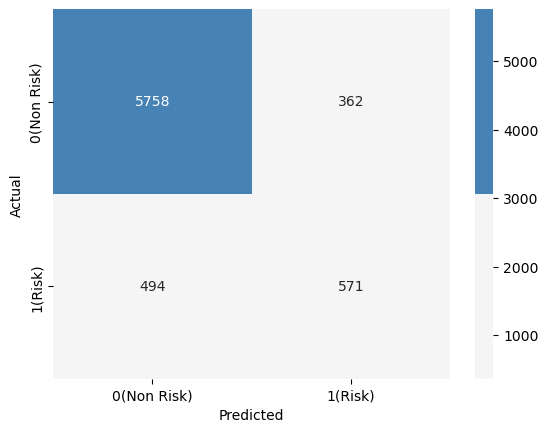

Accuracy: 0.8808629088378567
Recall: 0.536150234741784
Precision: 0.6120042872454448
F1: 0.5715715715715716


In [24]:
preds = xgb_tuned.predict(X_test.values)

conf_matrix(y_test, preds)

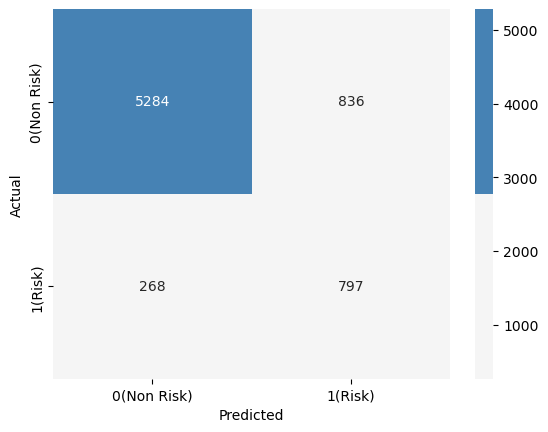

Accuracy: 0.8463465553235908
Recall: 0.748356807511737
Precision: 0.48805878750765463
F1: 0.5908080059303188


In [37]:
preds = lgbm_tuned.predict(X_test.values, verbose=-1)

conf_matrix(y_test, preds)

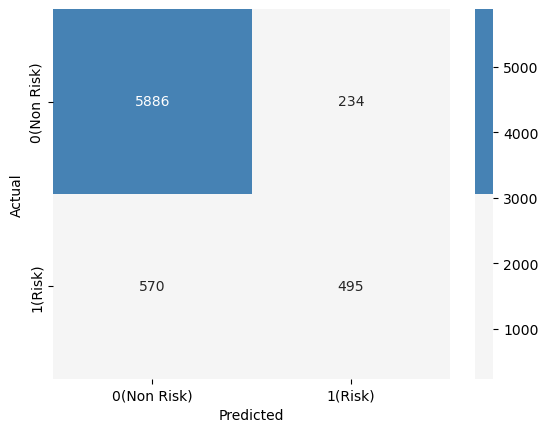

Accuracy: 0.8881002087682672
Recall: 0.4647887323943662
Precision: 0.6790123456790124
F1: 0.5518394648829432


In [26]:
preds = rf_tuned.predict(X_test.values)

conf_matrix(y_test, preds)

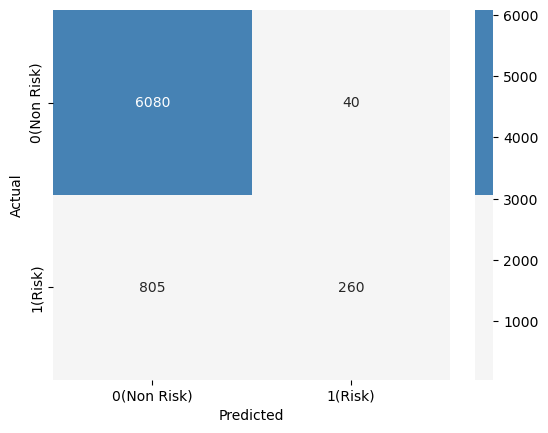

Accuracy: 0.8823938761308281
Recall: 0.24413145539906103
Precision: 0.8666666666666667
F1: 0.380952380952381


In [27]:
preds = lr_tuned.predict(X_test.values)

conf_matrix(y_test, preds)

In [46]:
str(lgbm_tuned)[:3]

'LGB'

In [48]:
models = [xgb_tuned, lgbm_tuned, rf_tuned, lr_tuned, resnet]
model_name = ['XGBoost', 'LightGBM', 'RandomForest', 'LogisticRegression', 'ResNet']

print('Tuned Model - except ResNet')

for i, model in enumerate(models):
    print(model_name[i])
    model_auc_roc(model)
    print()

Tuned Model - except ResNet
XGBoost
Model AUROC (binary): 0.7384999539721991
Model AUROC (probability): 0.8666068305256375

LightGBM
Model AUROC (binary): 0.8058777501610973
Model AUROC (probability): 0.8926229709411152

RandomForest
Model AUROC (binary): 0.7132767191383595
Model AUROC (probability): 0.8927002976464452

LogisticRegression
Model AUROC (binary): 0.6187977538433214
Model AUROC (probability): 0.8934662002516187

ResNet
Model AUROC (binary): 0.6904181625701924
Model AUROC (probability): 0.8484721071527203



In [49]:
xgb_preds_proba = xgb_tuned.predict_proba(X_test.values)[:, 1]
lgbm_preds_proba = lgbm_tuned.predict_proba(X_test.values, verbose=-1)[:, 1]
rf_preds_proba = rf_tuned.predict_proba(X_test.values)[:, 1]
lr_preds_proba = lr_tuned.predict_proba(X_test.values)[:, 1]
resnet_preds_proba = torch.sigmoid(resnet(torch.tensor(X_test.values, dtype=torch.float))).detach().numpy().reshape(-1, )
preds_proba_tuned = xgb_preds_proba + lgbm_preds_proba + rf_preds_proba + resnet_preds_proba + lr_preds_proba
preds_proba_tuned = pd.Series(preds_proba_tuned)

preds_proba_normalize_tuned = preds_proba_tuned / 5
preds_proba_normalize_tuned.describe()

count    7185.000000
mean        0.177477
std         0.195315
min         0.010537
25%         0.047260
50%         0.099415
75%         0.225491
max         0.982354
dtype: float64

In [50]:
print('Soft Voting AUROC (probability):', roc_auc_score(y_test, preds_proba_normalize_tuned))

Soft Voting AUROC (probability): 0.9128581730031605


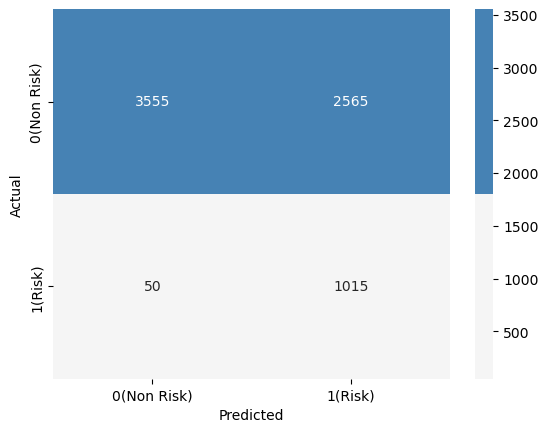

Accuracy: 0.6360473208072372
Recall: 0.9530516431924883
Precision: 0.2835195530726257
F1: 0.4370290635091496


In [31]:
test_pred_proba = np.where(preds_proba_normalize_tuned >= 0.1, 1, 0)

conf_matrix(y_test, test_pred_proba)

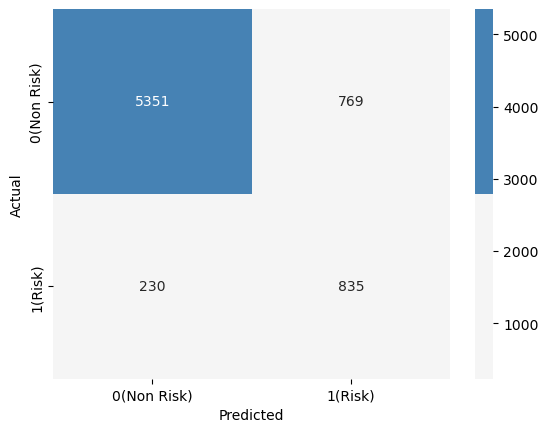

Accuracy: 0.8609603340292276
Recall: 0.784037558685446
Precision: 0.520573566084788
F1: 0.6257025103034843


In [32]:
test_pred_proba = np.where(preds_proba_normalize_tuned >= 0.25, 1, 0)

conf_matrix(y_test, test_pred_proba)

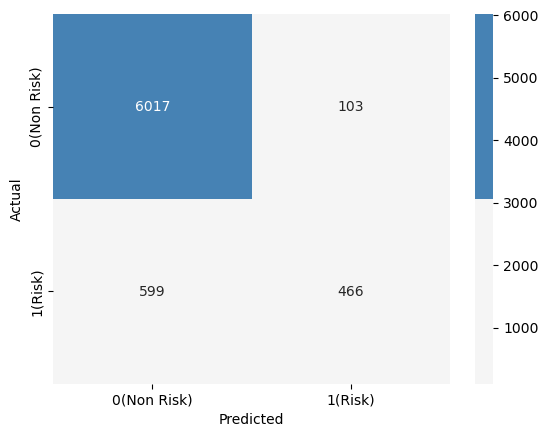

Accuracy: 0.9022964509394572
Recall: 0.4375586854460094
Precision: 0.8189806678383128
F1: 0.5703794369645042


In [33]:
test_pred_proba = np.where(preds_proba_normalize_tuned >= 0.5, 1, 0)

conf_matrix(y_test, test_pred_proba)

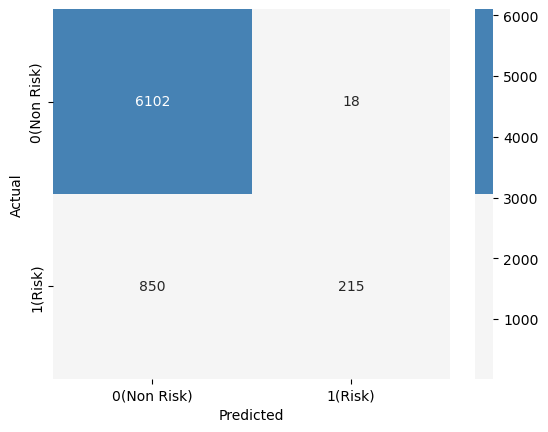

Accuracy: 0.8791927627000696
Recall: 0.20187793427230047
Precision: 0.9227467811158798
F1: 0.3312788906009245


In [34]:
test_pred_proba = np.where(preds_proba_normalize_tuned >= 0.75, 1, 0)

conf_matrix(y_test, test_pred_proba)

In [36]:
preds_df = pd.concat([preds_proba_normalize_tuned, y_test.reset_index(drop=True)], axis=1)
preds_df.columns = ['Preds', 'Label']

preds_df.groupby('Label')['Preds'].describe()

,count,mean,std,min,25%,50%,75%,max
Label,,,,,,,,
0,6120.0,0.123904,0.119205,0.010537,0.042390,0.079831,0.164553,0.894580
1,1065.0,0.485332,0.253922,0.012356,0.275363,0.461436,0.696522,0.982354


# Interpretation

using default models

In [25]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

pd.DataFrame(shap_values).to_csv('XGB_shap.csv')

In [ ]:
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_test)

pd.DataFrame(shap_values[1]).to_csv('LGBM_shap.csv')

In [ ]:
explainer = shap.Explainer(lr, X_test)
shap_values = explainer.shap_values(X_test)

pd.DataFrame(shap_values).to_csv('LR_shap.csv')

In [ ]:
explainer = shap.Explainer(rf, X_test)
shap_values = explainer.shap_values(X_test)

pd.DataFrame(shap_values[1]).to_csv('RF_shap.csv')

In [ ]:
explainer = shap.DeepExplainer(resnet, torch.tensor(X_test.values, dtype=torch.float))
shap_values = explainer.shap_values(torch.tensor(X_test.values, dtype=torch.float))

pd.DataFrame(shap_values).to_csv('ResNet_shap.csv')

In [7]:
xgb_shap = pd.read_csv('./XGB_shap.csv', names=X_test.columns, index_col=0, skiprows=1).reset_index(drop=True)
lgbm_shap = pd.read_csv('./LGBM_shap.csv', names=X_test.columns, index_col=0, skiprows=1).reset_index(drop=True)
rf_shap = pd.read_csv('./RF_shap.csv', names=X_test.columns, index_col=0, skiprows=1).reset_index(drop=True)
lr_shap = pd.read_csv('./LR_shap.csv', names=X_test.columns, index_col=0, skiprows=1).reset_index(drop=True)
resnet_shap = pd.read_csv('./ResNet_shap.csv', names=X_test.columns, index_col=0, skiprows=1).reset_index(drop=True)

assert xgb_shap.shape == lgbm_shap.shape == rf_shap.shape == lr_shap.shape == resnet_shap.shape == X_test.shape

In [8]:
global_shap = np.abs(xgb_shap) + np.abs(lgbm_shap) + np.abs(rf_shap) + np.abs(lr_shap) + np.abs(resnet_shap)
global_shap

,anchor_age,Lactic Acid,Temperature Fahrenheit,O2 saturation pulseoxymetry,Braden Mobility,Heart Rate,GCS - Motor Response,Respiratory Rate,NaCl 0.9%,Non Invasive Blood Pressure systolic,...,Direct Bilirubin,Wound Vac #1,Calcium Chloride,18 Gauge placed in the field,Unable to assess cognitive / perceptual,Orientation,Cerebral Subdural #1,Back Care,Ciprofloxacin,Dextrose 10%
0,0.885614,0.260229,0.236347,0.613491,0.526773,0.442001,0.773141,0.516660,0.530982,0.100896,...,0.020105,0.002790,0.001736,0.017135,0.042517,0.018581,0.000545,0.029014,0.000730,0.001029
1,0.314539,0.251958,1.026720,0.542693,0.369271,0.196303,0.829438,0.516314,0.778088,0.411230,...,0.016387,0.000453,0.002647,0.018339,0.046276,0.095815,0.000655,0.064057,0.000546,0.001358
2,1.047148,0.068114,0.680930,0.202661,0.543584,0.410961,0.271165,0.748303,0.793122,0.073405,...,0.021309,0.000524,0.002766,0.032301,0.119405,0.098362,0.001124,0.055082,0.001115,0.003309
3,0.630854,0.510246,0.778478,0.331992,1.165819,0.958246,0.528202,0.256276,0.354416,0.601106,...,0.021146,0.001977,0.002908,0.024706,0.065462,0.013764,0.001158,0.046772,0.000964,0.001611
4,2.854947,0.228811,0.477188,0.537702,0.606437,0.124827,0.782390,0.659520,0.594367,0.347429,...,0.015313,0.000472,0.003255,0.011678,0.057354,0.053606,0.000725,0.060019,0.000586,0.001111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7180,2.794419,0.092906,0.643690,0.406243,0.636557,0.033012,0.868788,0.446176,1.018558,0.323853,...,0.014733,0.000142,0.002885,0.012898,0.098763,0.099263,0.000512,0.063798,0.000559,0.001754
7181,0.421672,0.260649,0.536807,0.623884,0.519837,0.480880,0.923546,0.658226,0.880239,0.425780,...,0.015046,0.000426,0.004543,0.011869,0.100735,0.098687,0.001118,0.039270,0.000357,0.001380
7182,0.473862,0.250621,1.061423,0.402508,1.075339,0.450969,0.489067,0.472629,0.912257,0.517999,...,0.016360,0.000967,0.002750,0.018862,0.058995,0.052695,0.000601,0.043050,0.000807,0.000589
7183,1.530383,0.264278,0.112633,0.563694,0.963766,0.305647,1.147833,0.109823,0.375491,0.666049,...,0.021667,0.001392,0.002813,0.014555,0.445096,0.102435,0.000635,0.050454,0.000079,0.001748


In [9]:
# global top 20 important features 
global_shap.sum().sort_values(ascending=False).head(20)

anchor_age                     10852.096881
Lactate                         7631.581643
pCO2                            6866.106910
MCHC                            6306.856458
Braden Mobility                 5902.582676
Inspired O2 Fraction            5419.292146
GCS - Motor Response            5262.250437
Calculated Total CO2            5256.697628
Void                            5099.770977
Strength R Leg                  4969.683305
Richmond-RAS Scale              4834.645347
NaCl 0.9%                       4685.849153
Temperature Fahrenheit          4567.867472
RDW                             4561.368775
GCS - Eye Opening               4409.451760
O2 saturation pulseoxymetry     4214.309388
Braden Nutrition                4158.209357
Chloride                        3994.010492
Respiratory Rate (Total)        3561.960549
Respiratory Rate                3553.923748
dtype: float64

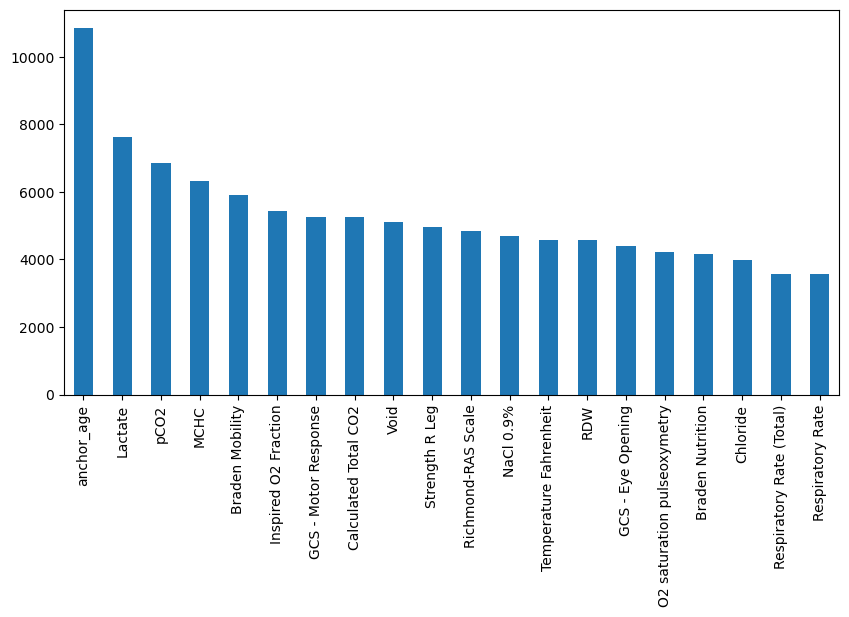

In [10]:
global_shap.sum().sort_values(ascending=False).head(20).plot.bar(figsize=(10, 5))
plt.show()

In [11]:
global_shap.to_csv('global_shap.csv')